# Notebook 3: DNAtype Classification

## Plan for Modeling:

With modeling I will start with a Logistic Regression

In [87]:
# imports
from IPython.display import Image
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score
from pandas import MultiIndex, Int16Dtype
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, plot_confusion_matrix,
                             plot_roc_curve, precision_score, recall_score,
                             roc_auc_score, roc_curve)
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from numpy import hstack, unique, vstack, where
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
import warnings
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

%matplotlib inline


# warnings.filterwarnings("ignore")
np.random.seed(123)


# Plan for Modelling:

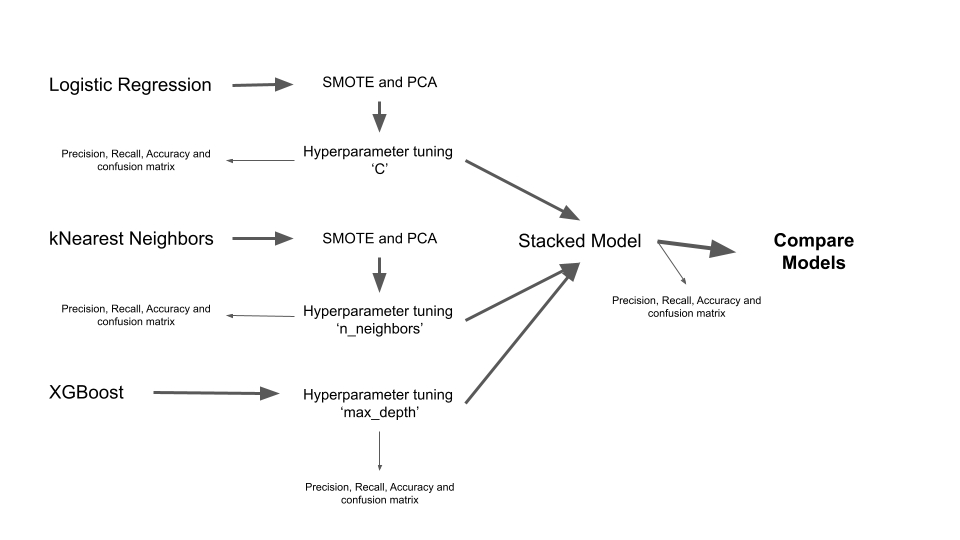

In [89]:
# you can find this image in the zip folder
Image('../notebooks/modelling_plan.png')
# change the path accordingly.


In [53]:
# import the data

codon = joblib.load('../data/codon_after_eda.pkl')


In [54]:
sns.set_theme(style="darkgrid")


In [55]:
codon


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,virus,0,100217,7.598900,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,virus,0,100220,7.296413,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,virus,0,100755,8.489411,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,virus,0,100880,7.557995,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,virus,0,100887,10.035918,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,vertebrate,0,9601,7.001246,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,vertebrate,1,9601,7.634337,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,vertebrate,1,9602,7.430707,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,vertebrate,0,9606,17.520819,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [56]:
codon.shape


(12964, 69)

<AxesSubplot:>

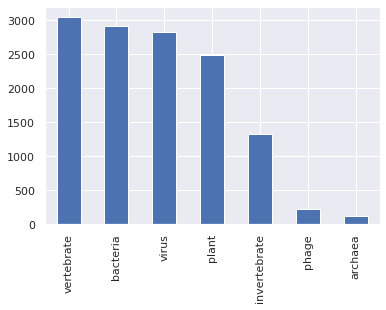

In [57]:
codon['Kingdom'].value_counts().plot(kind='bar')


<AxesSubplot:>

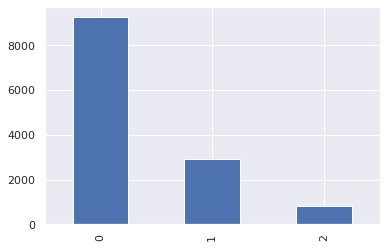

In [58]:
codon['DNAtype'].value_counts().plot(kind='bar')


In [59]:
codon.describe()


,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,...,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000
mean,0.349506,130573.312635,8.513725,0.024712,0.023460,0.020553,0.014084,0.017822,0.018338,0.019082,...,0.005441,0.009918,0.006431,0.024155,0.021198,0.028260,0.021707,0.001640,0.000591,0.006201
std,0.594362,124773.296344,1.647012,0.017437,0.011608,0.020605,0.009264,0.010602,0.014580,0.024299,...,0.006603,0.008575,0.006399,0.013844,0.013033,0.014348,0.015024,0.001788,0.000883,0.010363
min,0.000000,7.000000,6.908755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28897.000000,7.382591,0.013910,0.015397,0.005600,0.007090,0.010880,0.007860,0.005310,...,0.001220,0.001678,0.001160,0.012307,0.011890,0.017340,0.009747,0.000560,0.000000,0.000410
50%,0.000000,82005.000000,7.984803,0.021720,0.021920,0.015225,0.013345,0.016130,0.014600,0.009690,...,0.003520,0.009260,0.004550,0.025365,0.019105,0.026035,0.020585,0.001370,0.000420,0.001130
75%,1.000000,223048.250000,9.117731,0.031232,0.029250,0.029370,0.019790,0.022730,0.025160,0.017212,...,0.007110,0.015893,0.010300,0.034200,0.027692,0.036790,0.031160,0.002370,0.000830,0.002920
max,2.000000,465364.000000,17.520819,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


---

In [60]:
# assigning the target and features y and X

X = codon.drop(columns=['Kingdom', 'DNAtype',
               'SpeciesName', 'SpeciesID'])  # features
y = codon['DNAtype']  # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=123)

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size= 0.25, random_state=123)


# Vanilla Models:

Plan:

- Pipeline for kNearest Neighbors, Logistic Regression, Decision Tree
- Gridsearch and score comparison of the models

In [61]:
# Vanilla models pipeline


estimators = [('scaler', StandardScaler()), ('model', KNeighborsClassifier())]

pipe = Pipeline(estimators)

parameters = [{'model': [KNeighborsClassifier()],
               'scaler': [StandardScaler(), MinMaxScaler()]},


              {'model': [LogisticRegression(random_state=123, max_iter=10000)],
               'scaler': [StandardScaler(), MinMaxScaler(), None]},


              {'model': [DecisionTreeClassifier()],
               'scaler': [None]}]


In [62]:
# Gridsearch for vanilla
gridsearch = GridSearchCV(pipe, parameters, cv=5)

# fit to train data
fittedgrid = gridsearch.fit(X_train, y_train)


In [63]:
dna0_results_df = pd.DataFrame.from_dict(
    gridsearch.cv_results_, orient='columns')
dna0_results_df.sort_values(by='mean_test_score', ascending=False)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.007935,0.000073,0.062146,0.000578,KNeighborsClassifier(),MinMaxScaler(),"{'model': KNeighborsClassifier(), 'scaler': Mi...",0.992771,0.995661,0.994214,0.992768,0.991803,0.993443,0.001350,1
0,0.010356,0.000246,0.068231,0.006520,KNeighborsClassifier(),StandardScaler(),"{'model': KNeighborsClassifier(), 'scaler': St...",0.993253,0.994214,0.992768,0.993732,0.992768,0.993347,0.000562,2
2,0.128971,0.023637,0.001845,0.000116,"LogisticRegression(max_iter=10000, random_stat...",StandardScaler(),"{'model': LogisticRegression(max_iter=10000, r...",0.992771,0.993732,0.994214,0.993250,0.992285,0.993250,0.000681,3
3,0.068574,0.003267,0.001754,0.000074,"LogisticRegression(max_iter=10000, random_stat...",MinMaxScaler(),"{'model': LogisticRegression(max_iter=10000, r...",0.991807,0.990839,0.989392,0.991321,0.986982,0.990068,0.001742,4
5,0.361713,0.032015,0.001524,0.000075,DecisionTreeClassifier(),None,"{'model': DecisionTreeClassifier(), 'scaler': ...",0.980241,0.980714,0.975410,0.975892,0.977338,0.977919,0.002188,5
4,0.142138,0.024120,0.001372,0.000056,"LogisticRegression(max_iter=10000, random_stat...",None,"{'model': LogisticRegression(max_iter=10000, r...",0.952771,0.948409,0.946962,0.945516,0.945998,0.947931,0.002614,6


## Logistic Regression:

Distributions before and after SMOTE upsampling:


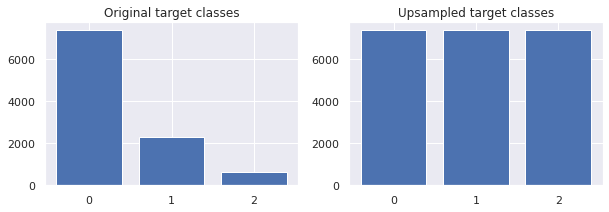

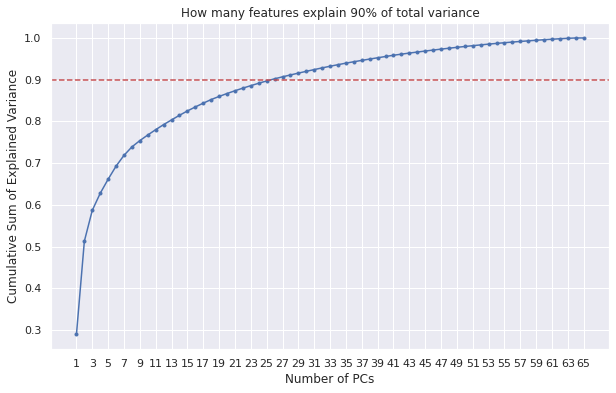

In [64]:
# Using SMOTE to balance the classes:

sm = SMOTE(random_state=123)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Plotting distributions
print('Distributions before and after SMOTE upsampling:')
plt.subplots(1, 2, figsize=(10, 3))

# Plot the original data
plt.subplot(1, 2, 1)
plt.bar(y_train.value_counts().index, y_train.value_counts())
plt.title('Original target classes')
plt.xticks(ticks=[0, 1, 2])

# Plot the upsampled data
plt.subplot(1, 2, 2)
plt.bar(y_train_sm.value_counts().index, y_train_sm.value_counts())
plt.title('Upsampled target classes')
plt.xticks(ticks=[0, 1, 2])

plt.show()
print('==============================================================================')

# scaling data for PCA tranform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)  # scaling the upsampled set
X_test_scaled = scaler.transform(X_test)

# PCA dimensionality reduction
pca = PCA()

# fit transform train set and transform test set
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
# to see the number of features that account for the highest variance
explained_variance = pca.explained_variance_ratio_

# cumulative sum of the explained variance
cumulative_sum = np.cumsum(explained_variance)

# plot
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train.columns)+1), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1, len(X_train.columns)+1, 2))
plt.title("How many features explain 90% of total variance")
plt.show()


In [65]:
# setting n_components and refitting a PCA

pca_0 = PCA(n_components=26)

# fit transform train set and transform test set
X_train_PCA_0 = pca_0.fit_transform(X_train_scaled)
X_test_PCA_0 = pca_0.transform(X_test_scaled)


In [66]:
# regularisation:

c_params = [0.0001, 0.001, 0.01, 0.1, 1, 10]

train_accuracies = []
test_accuracies = []

for c in c_params:
    logi_reg = LogisticRegression(C=c, max_iter=10000, random_state=123)

    logi_reg.fit(X_train_PCA_0, y_train_sm)

    train_accuracies.append(logi_reg.score(X_train_PCA_0, y_train_sm))
    test_accuracies.append(logi_reg.score(X_test_PCA_0, y_test))


Text(0.5, 1.0, 'Accuracies for logi_reg model')

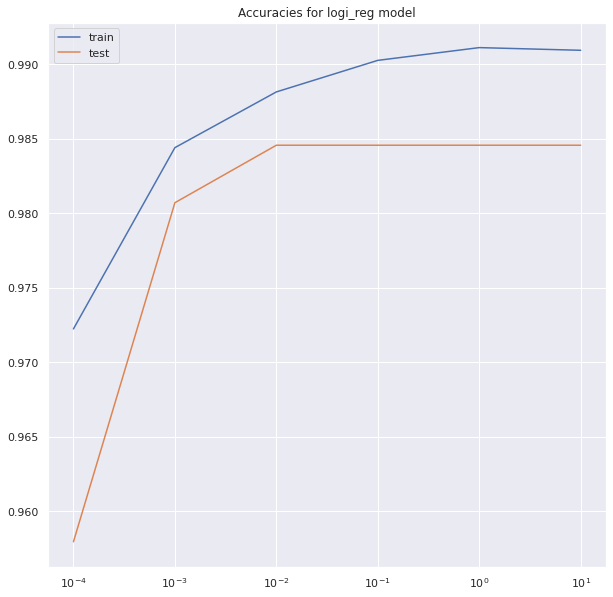

In [67]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 10))
plt.plot(c_params, train_accuracies, label='train')
plt.plot(c_params, test_accuracies, label='test')
plt.xscale('log')
plt.legend()
plt.title('Accuracies for logi_reg model')


In [68]:
# For C =0.1

log_reg_0 = LogisticRegression(C=0.1, max_iter=10000, random_state=123)

log_reg_0.fit(X_train_PCA_0, y_train_sm)

print(
    f'log_reg_0 model train score: {log_reg_0.score(X_train_PCA_0, y_train_sm).round(3)}')
print(
    f'log_reg_0 model test score: {log_reg_0.score(X_test_PCA_0, y_test).round(3)}')


log_reg_0 model train score: 0.99
log_reg_0 model test score: 0.985


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1850
           1       0.98      0.98      0.98       580
           2       0.88      0.96      0.92       163

    accuracy                           0.98      2593
   macro avg       0.95      0.98      0.96      2593
weighted avg       0.99      0.98      0.98      2593

Logistic Regression model AUC score
roc_auc_score: 1.0


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Predicted 0,Predicted 1,Predicted 2
True 0,1828,8,14
True 1,4,569,7
True 2,4,3,156


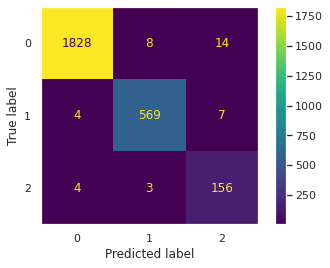

In [69]:
y_predicted = log_reg_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_predicted)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])


sns.set_theme(style="dark")
plot_confusion_matrix(log_reg_0, X_test_PCA_0, y_test)
print('==========================================================')

# Precision, recall, and F1 score:
class_report_log_0 = classification_report(y_test, y_predicted)
print(class_report_log_0)
print('==========================================================')

# AUC score
y_proba_train = log_reg_0.predict_proba(X_train_PCA_0)
auc_train = np.round(roc_auc_score(
    y_train_sm, y_proba_train, multi_class='ovo'), 3)
print('Logistic Regression model AUC score')
print(f'roc_auc_score: {auc_train}')
print('==========================================================')

cf_df


- **Interpreting Results for Logistic Regression**

Logistic Regression model classifies using a logistic function, where the output is either 1 or 0, this is usually for binomial classification.
I balanced the classes using SMOTE, and then performed a PCA fit on the train and transformed the test set.
PCA reduces dimensionality to reduce overfitting, and use fewer features from the dataset. According to the graph above, the number of number of components needed to explain 90% of the variance is 29.

The Logistic Regression model `log_reg_0` has performed well on the dataset with an accuracy score of 0.99 on training data and 0.985 on the test data.

Furthermore, hyperparameter tuning showed that a high penalty of C=0.1 was the appropriate value to achieve a higher accuracy score.

The model performed well on classifying the DNA types, with an F1 score of 0.99, 0.98, and 0.89 for types 0 (nuclear), 1 (mitochondrial), and 2(chloroplast) respectively. This shows that the model has equivently good precision and recall, meaning that the model classified the classes correctly the majority of time with low percentage of false positives overall.

The AUC score of 0.999 shows that the model performed well overall at distinguishing between the classes.

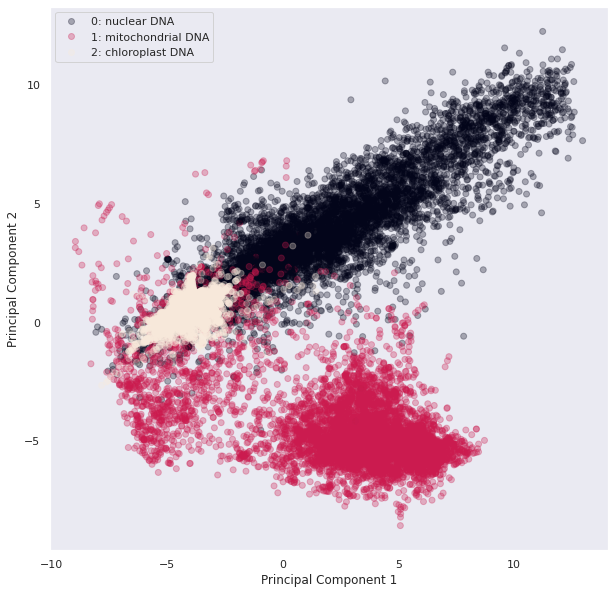

In [70]:
# Visualising the PCA components in a scatter graph
plt.figure(figsize=(10, 10))
scatter = plt.scatter(
    X_train_PCA_0[:, 0], X_train_PCA_0[:, 1], alpha=0.3, c=y_train_sm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
classes = ['0: nuclear DNA', '1: mitochondrial DNA', '2: chloroplast DNA']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()


The principal components analysis of the features shows good separation between the `DNAtype` classes, this could be why the logistic regression is performing well on this dataset,

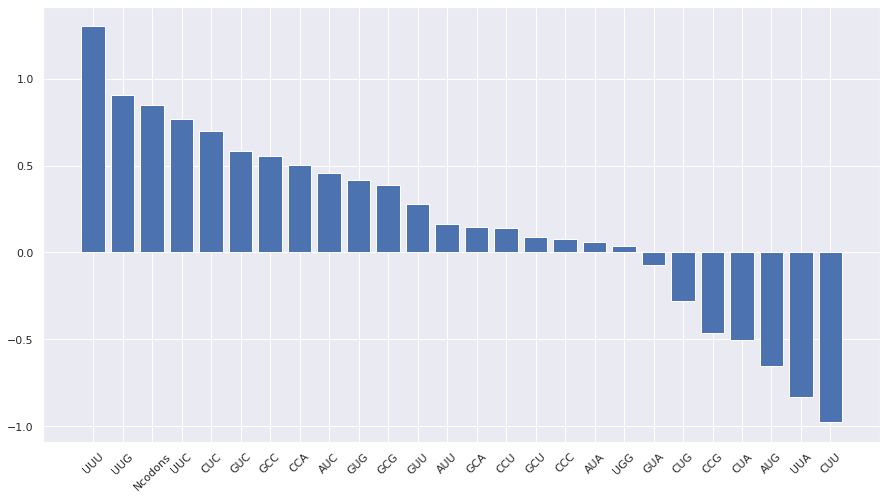

In [85]:
# Feature importance
coefs = pd.DataFrame(log_reg_0.coef_[0], columns=['coefficients'])
coefs

feat_names = pd.DataFrame(X_train.columns, columns=['feature_names'])
feat_names

feat_coefs = pd.concat([feat_names, coefs], axis=1, ignore_index=True)

feat_coefs = feat_coefs.sort_values(
    by=1, ascending=False).set_index(0).head(26)

# plotting coefficients
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 8))
plt.bar(feat_coefs.index, feat_coefs[1])
plt.xticks(rotation=45)
plt.show()


Logistic Regression adds coefficients (beta1) to each feature, the above bar chart shows the coefficients for the 26 features for the `0: nuclear`. the coefficients represent the log odds of a feature change effecting the outcome.

for the `log_reg_0` model, the above barchart shows that with increase frequency of `UUU` and `UUG` for example, there is an increased odds of `0: nuclear` classification.
The bar grapgh shows how the model made the decision of classification, in terms of these features.

`Ncodons` appears to be a feature with a positive and high coefficient for the nuclear DNA (0) class, this makes sense because Ncodons represents the size of the sequence, nuclear DNA is the larger of the DNAtypes so the number of codons would reflect this.

## kNearest Neighbors model:

In [72]:
# using the already scaled and PCA tranformed sets from previous model

# Determining the ideal n_neighbors value:

n_neighbors = range(1, 100, 2)

train_accuracies_0 = []
test_accuracies_0 = []

for n in n_neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_train_PCA_0, y_train_sm)

    train_accuracies_0.append(KNN_model.score(X_train_PCA_0, y_train_sm))
    test_accuracies_0.append(KNN_model.score(X_test_PCA_0, y_test))


Text(0.5, 1.0, 'Accuracies for KNN_model')

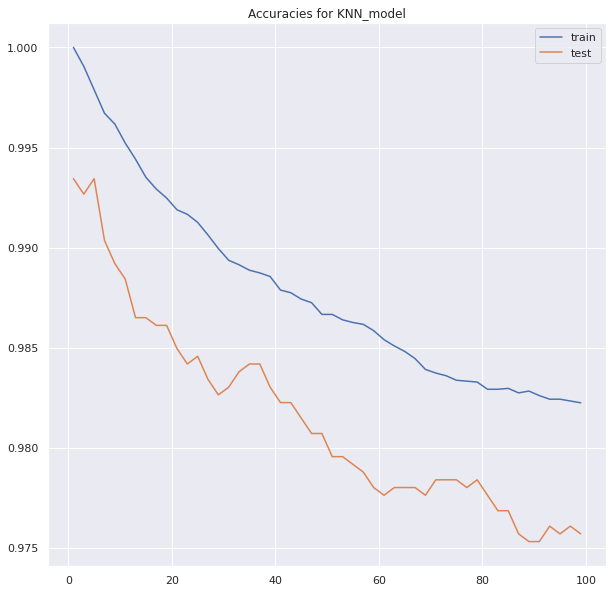

In [73]:
plt.figure(figsize=(10, 10))
plt.plot(n_neighbors, train_accuracies_0, label='train')
plt.plot(n_neighbors, test_accuracies_0, label='test')
plt.legend()
plt.title('Accuracies for KNN_model')


In [74]:
Knn_accuracies_df = pd.DataFrame({'number of neighbors': n_neighbors,
                                 'Train scores': train_accuracies_0, 'Test scores': test_accuracies_0})
Knn_accuracies_df.head(5)


,number of neighbors,Train scores,Test scores
0,1,1.000000,0.993444
1,3,0.999054,0.992673
2,5,0.997883,0.993444
3,7,0.996711,0.990359
4,9,0.996171,0.989202


In [75]:
KNN_model_0 = KNeighborsClassifier(n_neighbors=3)
KNN_model_0.fit(X_train_PCA_0, y_train_sm)

print(
    f'KNN_model train score: {KNN_model_0.score(X_train_PCA_0, y_train_sm).round(3)}')
print(
    f'KNN_model test score: {KNN_model_0.score(X_test_PCA_0, y_test).round(3)}')


KNN_model train score: 0.999
KNN_model test score: 0.993


              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1850
           1       0.99      0.99      0.99       580
           2       0.96      0.99      0.97       163

    accuracy                           0.99      2593
   macro avg       0.98      0.99      0.99      2593
weighted avg       0.99      0.99      0.99      2593



/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


KNN model AUC score
roc_auc_score: 1.0


,Predicted 0,Predicted 1,Predicted 2
True 0,1839,7,4
True 1,3,574,3
True 2,1,1,161


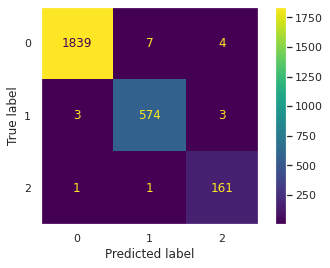

In [76]:
y_predicted_0 = KNN_model_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix_0 = confusion_matrix(y_test, y_predicted_0)

# label rows and columns
cf_df_0 = pd.DataFrame(
    cf_matrix_0,
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])


print('==========================================================')
sns.set_theme(style="dark")
plot_confusion_matrix(KNN_model_0, X_test_PCA_0, y_test)

# Precision, recall, and F1 scores
class_report_knn_0 = classification_report(y_test, y_predicted_0)
print(class_report_knn_0)
print('==========================================================')

# AUC score
y_proba_train_0 = KNN_model_0.predict_proba(X_train_PCA_0)
auc_train_0 = np.round(roc_auc_score(
    y_train_sm, y_proba_train_0, multi_class='ovo'), 3)
print('KNN model AUC score')
print(f'roc_auc_score: {auc_train_0}')
print('==========================================================')


cf_df_0


- **Interpreting Results for kNearest Neighbors**:

kNearest Neighbor model classifies by determining the distances between the data points: data points closest to each other are classified as being from the same class, depending on the number of nearest neighbors selected.
Because KNN usese distances between data points, I scaled the data performed PCA and used the SMOTE transformed data.

The KNN_model_0 performed very well, with an accuracy score of 0.999 for the training data and 0.993 for the test data, for a value of n_neighbors = 3.

The model performed well on all of the classes, with improvement in the precision and recall scores: F1 scores of 1.0, 0.99, and 0.97 for 0 (nuclear), 1 (mitochondrial), and 2 (chloroplast) respectively.

Overall the KNN_model_0 performed well on distinguising between the classes with an AUC score of 1.0.

## XGBoost model:

In [77]:
maxdepth = range(1, 10)

train_accuracies_1 = []
test_accuracies_1 = []

for d in maxdepth:
    XGB_model = XGBClassifier(max_depth=d, use_label_encoder=False)
    XGB_model.fit(X_train, y_train)

    train_accuracies_1.append(XGB_model.score(X_train, y_train))
    test_accuracies_1.append(XGB_model.score(X_test, y_test))


,max Depth,Train scores,Test scores
2,3,1.000000,0.994601
4,5,1.000000,0.994601
5,6,1.000000,0.994601
6,7,1.000000,0.994601
8,9,1.000000,0.994601
3,4,1.000000,0.994215
1,2,0.999807,0.993444
7,8,1.000000,0.993444
0,1,0.995565,0.991516


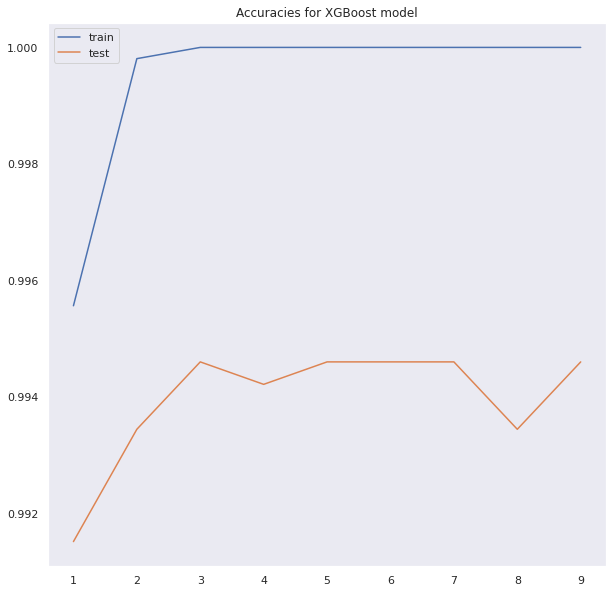

In [78]:
plt.figure(figsize=(10, 10))
plt.plot(maxdepth, train_accuracies_1, label='train')
plt.plot(maxdepth, test_accuracies_1, label='test')
plt.legend()
plt.title('Accuracies for XGBoost model')


XGB_accuracies_df = pd.DataFrame(
    {'max Depth': maxdepth, 'Train scores': train_accuracies_1, 'Test scores': test_accuracies_1})
XGB_accuracies_df.sort_values(by='Test scores', ascending=False).head(10)


In [79]:
# XGBoost with max+depth = 3

XGB_model_0 = XGBClassifier(max_depth=3, use_label_encoder=False)
XGB_model_0.fit(X_train, y_train)

print(
    f'XGBoost train accuracy: {XGB_model_0.score(X_train, y_train).round(3)}')
print(f'XGBoost test accuracy: {XGB_model_0.score(X_test, y_test).round(3)}')


XGBoost train accuracy: 1.0
XGBoost test accuracy: 0.995


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1850
           1       0.99      0.99      0.99       580
           2       0.99      0.96      0.97       163

    accuracy                           0.99      2593
   macro avg       0.99      0.98      0.99      2593
weighted avg       0.99      0.99      0.99      2593

XGBoost model AUC score
roc_auc_score: 1.0


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Predicted 0,Predicted 1,Predicted 2
True 0,1848,1,1
True 1,4,575,1
True 2,5,2,156


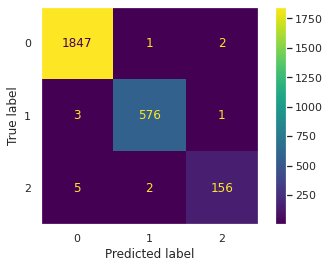

In [80]:
y_predicted_1 = XGB_model_0.predict(X_test)

# Generate confusion matrix
cf_matrix_1 = confusion_matrix(y_test, y_predicted_1)

# label rows and columns
cf_df_1 = pd.DataFrame(
    cf_matrix_1,
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])


sns.set_theme(style="dark")
plot_confusion_matrix(XGB_model, X_test, y_test)

print('==========================================================')


# Precision Recall and F1 scores
class_report_xgb_0 = classification_report(y_test, y_predicted_1)
print(class_report_xgb_0)
print('==========================================================')


# AUC score
y_proba_train_1 = XGB_model_0.predict_proba(X_train)
auc_train_1 = np.round(roc_auc_score(
    y_train, y_proba_train_1, multi_class='ovo'), 3)
print('XGBoost model AUC score')
print(f'roc_auc_score: {auc_train_1}')

print('==========================================================')
cf_df_1


- **Interpreting Results for XGBoost model**:

XGBoost model is an ensemble model, it classifies data using decision trees in ensembles. Using max_depth as the hyperparameter, which determines the maximium depth of the trees. I did not use the scaled, oversamples, and PCA transformed data for this model, as this is not needed.


For XGB_model_0 the appropriate value for max_depth was determined to be 3, this gave an accuracy score of 1.0 for training data and 0.995 for test data. The model did not overfit on the training data, the model is performing just as well on the training data and on unseen data (test set).

The model performed very well on the data, showing high F1 scores, identical to the KNN_model_0, which shows that the use of two different classification models with different approaches are able to classify the target data really well.

Furthermore, this model performed well on distinguishing between the classes with an AUC score of 1.0.

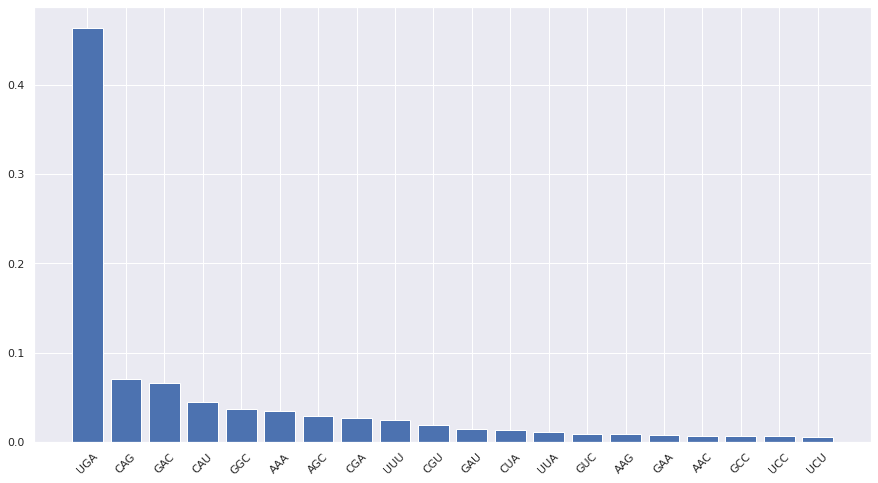

In [83]:
feat_imprt = pd.DataFrame(
    XGB_model_0.feature_importances_).sort_values(by=0, ascending=False)

feat_names_0 = pd.DataFrame(X_train.columns, columns=['feature_names'])

# join inner because the ndarray lengths are different
feat_coefs_0 = pd.concat([feat_names_0, feat_imprt],
                         axis=1, ignore_index=True, join='inner')

feat_coefs_0 = feat_coefs_0.sort_values(
    by=1, ascending=False).set_index(0).head(20)

# plotting coefficients
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 8))
plt.bar(feat_coefs_0.index, feat_imprt[0][:20])
plt.xticks(rotation=45)
plt.show()


Feature importance for XGBoost models shows the features that the model deemed most important in making the classification decision. 

the above bar chart shows the codons importance according to `gain` metric, which is the relative contribution of each feature for each tree in the ensemble (XGBoost) model. 
This means that `UGA` having the highest values of importance were the most important in generating a prediction of the outcome classification.

## Ensemble Model

In [41]:
# We instantiate the base models, along with their names
base_models = [('KNN', KNN_model_0),
               ('XGBoost', XGB_model_0)
               ]


# building the stacked model
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(random_state=123, max_iter=10000),
    passthrough=True)

stacked_model.fit(X_train, y_train)


StackingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None, gamma=0,
                                              gpu_id=-1,
                                              grow_policy='depthwise',
                                              importance_type=None,
                                              interaction_c...
                                              learning_rate=0.300000012,
                                              max_bin=256, max_cat_to_onehot=4,
                                              max_delta_step=0, max_depth=3,
                                              max_leaves=0, min_child_weight=1,
                                              missing=nan,
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=0,
                                              num_parallel_tree=1,
                                              objective='multi:softprob',
                                              predictor='auto', random_state=0,
                                              reg_alpha=0, ...))],
                   final_estimator=LogisticRegression(max_iter=10000,
                                                      random_state=123),
                   passthrough=True)

In [42]:
print(
    f'Stacked model train accuracy: {stacked_model.score(X_train, y_train).round(3)}')
print(
    f'Stacked model test accuracy: {stacked_model.score(X_test, y_test).round(3)}')


Stacked model train accuracy: 1.0
Stacked model test accuracy: 0.995


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1850
           1       0.99      0.99      0.99       580
           2       0.99      0.96      0.97       163

    accuracy                           0.99      2593
   macro avg       0.99      0.98      0.99      2593
weighted avg       0.99      0.99      0.99      2593

AUC score for Stacked model
roc_auc_score: 1.0


,Predicted 0,Predicted 1,Predicted 2
True 0,1848,1,1
True 1,4,575,1
True 2,5,2,156


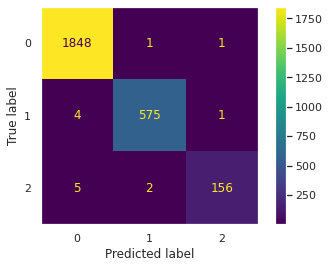

In [43]:
y_predicted_2 = stacked_model.predict(X_test)

# Generate confusion matrix
cf_matrix_2 = confusion_matrix(y_test, y_predicted_2)

# label rows and columns
cf_df_2 = pd.DataFrame(
    cf_matrix_2,
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])


sns.set_theme(style="dark")
plot_confusion_matrix(stacked_model, X_test, y_test)

print('==========================================================')


# Precision Recall and F1 scores
class_report_stack_0 = classification_report(y_test, y_predicted_2)
print(class_report_stack_0)
print('==========================================================')


# AUC score
y_proba_train_2 = stacked_model.predict_proba(X_train)
auc_train_2 = np.round(roc_auc_score(
    y_train, y_proba_train_2, multi_class='ovo'), 3)
print('AUC score for Stacked model')
print(f'roc_auc_score: {auc_train_2}')
print('==========================================================')

cf_df_2


- **Interpreting Results for the sctacked (ensemble) model**:

For the ensemble or stacked model, I used the models I already trained and tuned, with the exception of the logistic regression model `log_reg_0`; I decided to exclude this model as it was the model that underperformed on classifying the target variable.

I only included `XGB_model_0` and `KNN_model_0` as base models, with a final estimator being a default Logistic Regression model. Each of the base estimators is different in the way it approaches the classification.

The ensemble model classifies by taking the outputs from both the XGBoost model and KNN model as probabilites of each class as an input, the final estimator being a logistic regression then uses logistic function to classify each class.

`stacked_model` achieved an accuracy score of 1.0 for the train data and 0.995 for the test data.

The stacked model did well in distinguishing between the classes with an AUC of 1.0.

---

## Comparing Models

In [86]:
cls = classification_report(y_test, y_predicted, output_dict=True)
cls_0 = classification_report(y_test, y_predicted_0, output_dict=True)
cls_1 = classification_report(y_test, y_predicted_1, output_dict=True)
cls_2 = classification_report(y_test, y_predicted_2, output_dict=True)


comparison_df = pd.DataFrame({'Precision':
                             [cls['weighted avg']['precision'],
                              cls_0['weighted avg']['precision'],
                              cls_1['weighted avg']['precision'],
                              cls_2['weighted avg']['precision']],
                              'Recall':
                             [cls['weighted avg']['recall'],
                              cls_0['weighted avg']['recall'],
                              cls_1['weighted avg']['recall'],
                              cls_2['weighted avg']['recall']],
                             'F1 score':
                              [cls['weighted avg']['f1-score'],
                              cls_0['weighted avg']['f1-score'],
                               cls_1['weighted avg']['f1-score'],
                              cls_2['weighted avg']['f1-score']],
                              'Accuracy':
                              [cls['accuracy'],
                               cls_0['accuracy'],
                               cls_1['accuracy'],
                               cls_2['accuracy']],
                              'AUC score':
                              [auc_train,
                               auc_train_0,
                               auc_train_1,
                               auc_train_2]
                              },
                             index=['Logistic Regression', 'kNearest Neighbors', 'XGBoost', 'Stacked model'])

comparison_df.round(3).sort_values(by='F1 score', ascending=False)


,Precision,Recall,F1 score,Accuracy,AUC score
XGBoost,0.995,0.995,0.995,0.995,1.0
Stacked model,0.995,0.995,0.995,0.995,1.0
kNearest Neighbors,0.993,0.993,0.993,0.993,1.0
Logistic Regression,0.985,0.985,0.985,0.985,1.0


According to the `F1 score` XGBoost model and the Stacked model performed the best and similarly. This makes sense, contrary to the Kingdom classification, the DNAtype only has three classes, which means that the XGBoost would perform better in this classification as it can get a pure node easier.

Looking at the vanilla models performed at the beginning the accuracy score for the kNearest Neighbor performed was 99.3%, so I only achived an improvement of %0.2 for the `DNAtype` classses classification.

---

## Saving Models:

In [73]:
# Logistic Regression model
log_reg_dna = 'finalized_log_reg_dna.sav'
joblib.dump(log_reg_0, log_reg_dna)


# kNearest Neighbor model
knn_dna = 'finalized_knn_dna.sav'
joblib.dump(KNN_model_0, knn_dna)

# XGBoost model
xgboost_dna = 'finalized_xgboost_dna.sav'
joblib.dump(XGB_model_0, xgboost_dna)

# Ensemble model
stacked_dna = 'finalized_stacked_dna.sav'
joblib.dump(stacked_model, stacked_dna)


['finalized_stacked_dna.sav']